In [1]:
import xarray as xr
import numpy as np
import numpy as np
import xarray as xr
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [3]:
csv_path="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/country_seasonal_and_annual_power_fractional.csv"

In [5]:
model_colors = {
    "ACCESS-CM2":     "#1f77b4",  # blue
    "CMCC-ESM2":      "#8c564b",  # brown
    "HadGEM3-GC31-LL":"#e377c2",  # pink
    "MRI-ESM2-0":     "#17becf",  # teal
    "CMCC-CM2-SR5":   "#d62728",  # red
    "CanESM5":        "#ff7f0e",  # orange
    "HadGEM3-GC31-MM":"#bcbd22",  # olive
}

In [7]:
# Required setup (add after imports)
EU27 = ['AT','BE','BG','HR','CZ','DK','EE','FR','DE','GR','HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO','SK','SI','ES','SE','CY']
extras = ['GB', 'NO', 'BA', 'ME', 'RS', 'AL', 'MK', 'CH', 'IS', 'TR', 'UA', 'BY', 'MD', 'XK']
countries_of_interest = EU27 + extras

# Load and filter
df = pd.read_csv(csv_path)
df = df[df['season'] == 'Annual']
df = df[df['ISO_A2'].isin(countries_of_interest)].copy()

# Focus on target years
df = df[df['year'].between(1980, 2014) | df['year'].between(2065, 2099)]

# Sum across countries per year, model, period
grouped = (
    df.groupby(['year', 'model', 'period'])['power']
    .sum()
    .reset_index()
)

# Convert to TWh for readability
grouped['power_MWh'] = grouped['power'] / 1e3



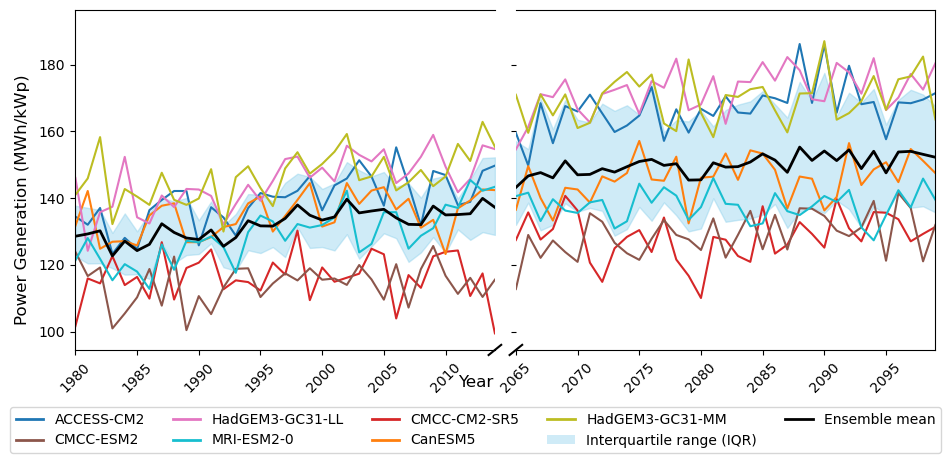

In [9]:
# Same setup as before up to pivot creation:
pivot = grouped.pivot(index='year', columns='model', values='power_MWh')
median_series = pivot.mean(axis=1)
q1_series = pivot.quantile(0.25, axis=1)
q3_series = pivot.quantile(0.75, axis=1)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    1, 2, sharey=True, figsize=(10, 5),
    gridspec_kw={'width_ratios':[1,1]}
)

ax1.set_xlim(1980, 2014)
ax2.set_xlim(2065, 2099)
for ax in (ax1, ax2):
    ax.set_ylim(pivot.min().min()*0.95, pivot.max().max()*1.05)
    ax.tick_params(axis='x', rotation=45, pad=4)
    ax.tick_params(axis='y', pad=4)

# Axis break
d = 0.015
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.plot((1-d, 1+d), (-d, d), transform=ax1.transAxes, color='k', clip_on=False)
ax2.plot((-d, d), (-d, d), transform=ax2.transAxes, color='k', clip_on=False)

# Plot model lines
for model in pivot.columns:
    data = pivot[model]
    # BOC
    data_boc = data.loc[1980:2014]
    ax1.plot(data_boc.index, data_boc,
             color=model_colors.get(model, 'gray'), lw=1.5,
             label=model)
    # EOC
    data_eoc = data.loc[2065:2099]
    ax2.plot(data_eoc.index, data_eoc,
             color=model_colors.get(model, 'gray'), lw=1.5)


# Plot IQR shading
for ax in (ax1, ax2):
    iqr_x = q1_series.loc[ax.get_xlim()[0]:ax.get_xlim()[1]].index
    q1 = q1_series.loc[iqr_x]
    q3 = q3_series.loc[iqr_x]
    ax.fill_between(iqr_x, q1, q3, color='skyblue', alpha=0.4,
                    label='Interquartile range (IQR)' if ax==ax1 else None)

# Plot ensemble median
for ax in (ax1, ax2):
    med = median_series.loc[ax.get_xlim()[0]:ax.get_xlim()[1]]
    ax.plot(med.index, med, color='black', lw=2,
            label='Ensemble mean' if ax==ax1 else None)

# Labels and title
fig.supxlabel("Year", y=0.12)
fig.supylabel("Power Generation (MWh/kWp)", x=0.04)

# Legend
handles = [plt.Line2D([],[],color=model_colors[m],lw=2) for m in model_colors]
handles += [
    plt.Rectangle((0,0),1,1,facecolor="skyblue",edgecolor="none",alpha=0.4),
    plt.Line2D([],[],color='k',lw=2)
]
labels = list(model_colors.keys()) + ['Interquartile range (IQR)', 'Ensemble mean']
fig.legend(handles, labels, loc='lower center', ncol=5, frameon=True, bbox_to_anchor=(0.5, -0.02))

# Layout adjustment
fig.subplots_adjust(left=0.1, right=0.96, top=0.88, bottom=0.2, wspace=0.05)
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/time_plot_europe_power.pdf", bbox_inches='tight', dpi=300)
plt.show()


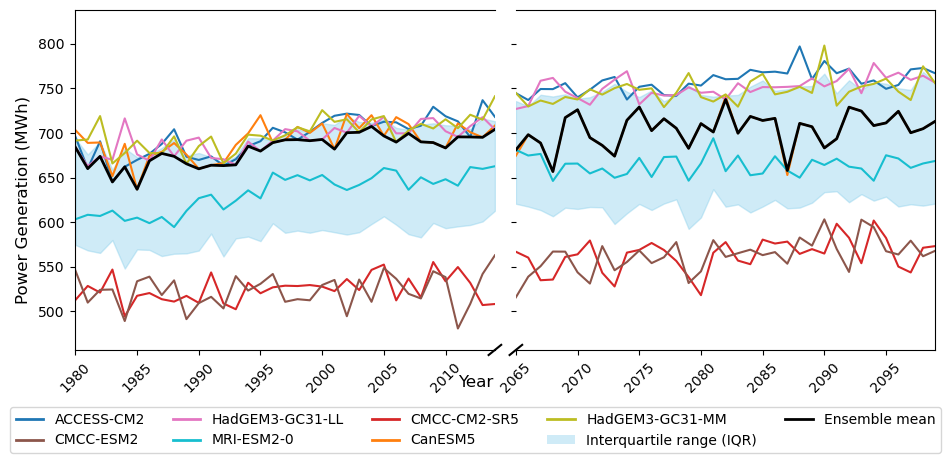

In [ ]:
# Same setup as before up to pivot creation:
pivot = grouped.pivot(index='year', columns='model', values='power_MWh')
median_series = pivot.median(axis=1)
q1_series = pivot.quantile(0.25, axis=1)
q3_series = pivot.quantile(0.75, axis=1)

# Plotting
fig, (ax1, ax2) = plt.subplots(
    1, 2, sharey=True, figsize=(10, 5),
    gridspec_kw={'width_ratios':[1,1]}
)

ax1.set_xlim(1980, 2014)
ax2.set_xlim(2065, 2099)
for ax in (ax1, ax2):
    ax.set_ylim(pivot.min().min()*0.95, pivot.max().max()*1.05)
    ax.tick_params(axis='x', rotation=45, pad=4)
    ax.tick_params(axis='y', pad=4)

# Axis break
d = 0.015
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.plot((1-d, 1+d), (-d, d), transform=ax1.transAxes, color='k', clip_on=False)
ax2.plot((-d, d), (-d, d), transform=ax2.transAxes, color='k', clip_on=False)

# Plot model lines
for model in pivot.columns:
    data = pivot[model]
    # BOC
    data_boc = data.loc[1980:2014]
    ax1.plot(data_boc.index, data_boc,
             color=model_colors.get(model, 'gray'), lw=1.5,
             label=model)
    # EOC
    data_eoc = data.loc[2065:2099]
    ax2.plot(data_eoc.index, data_eoc,
             color=model_colors.get(model, 'gray'), lw=1.5)


# Plot IQR shading
for ax in (ax1, ax2):
    iqr_x = q1_series.loc[ax.get_xlim()[0]:ax.get_xlim()[1]].index
    q1 = q1_series.loc[iqr_x]
    q3 = q3_series.loc[iqr_x]
    ax.fill_between(iqr_x, q1, q3, color='skyblue', alpha=0.4,
                    label='Interquartile range (IQR)' if ax==ax1 else None)

# Plot ensemble median
for ax in (ax1, ax2):
    med = median_series.loc[ax.get_xlim()[0]:ax.get_xlim()[1]]
    ax.plot(med.index, med, color='black', lw=2,
            label='Ensemble mean' if ax==ax1 else None)

# Labels and title
fig.supxlabel("Year", y=0.12)
fig.supylabel("Power Generation (MWh/kWp)", x=0.04)

# Legend
handles = [plt.Line2D([],[],color=model_colors[m],lw=2) for m in model_colors]
handles += [
    plt.Rectangle((0,0),1,1,facecolor="skyblue",edgecolor="none",alpha=0.4),
    plt.Line2D([],[],color='k',lw=2)
]
labels = list(model_colors.keys()) + ['Interquartile range (IQR)', 'Ensemble mean']
fig.legend(handles, labels, loc='lower center', ncol=5, frameon=True, bbox_to_anchor=(0.5, -0.02))

# Layout adjustment
fig.subplots_adjust(left=0.1, right=0.96, top=0.88, bottom=0.2, wspace=0.05)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

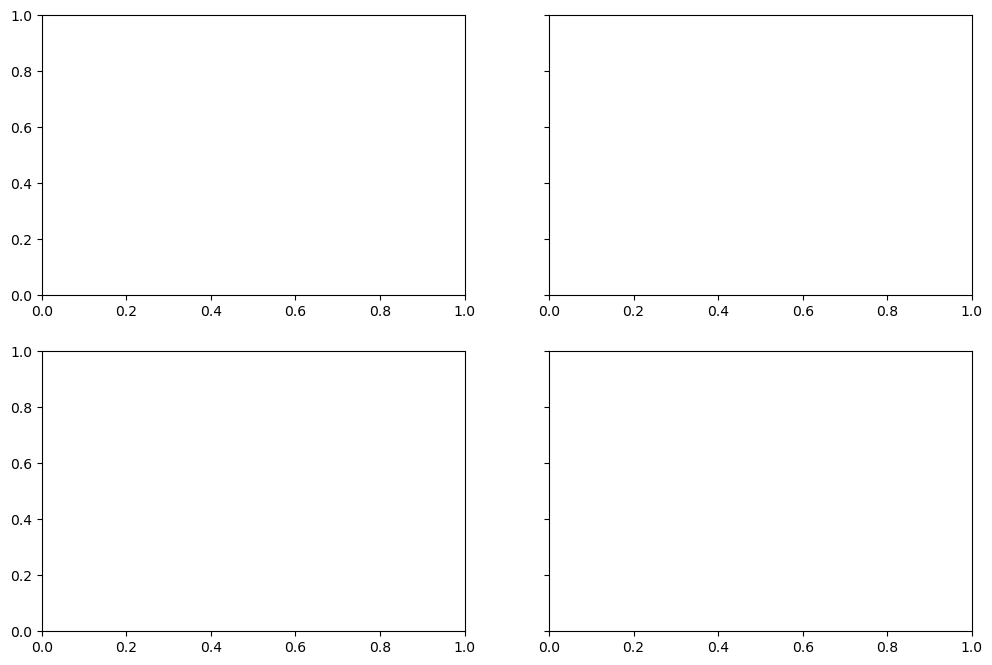

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
EU27 = ['AT','BE','BG','HR','CZ','DK','EE','FR','DE','GR','HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO','SK','SI','ES','SE','CY']
extras = ['GB', 'NO', 'BA', 'ME', 'RS', 'AL', 'MK', 'CH', 'IS', 'TR', 'UA', 'BY', 'MD', 'XK']
countries_of_interest = EU27 + extras

# Load and filter
df = pd.read_csv(csv_path)
# Ensure power is in MWh (if originally in kWh)
df['power_MWh'] = df['power'] / 1e3

# Filter: countries of interest, years, and just seasonal entries
df_countries= df['ISO_A2'].isin(countries_of_interest)
df_season=df['season'].isin(['Winter', 'Spring', 'Summer', 'Autumn'])
df_seasonal = df[
    df['ISO_A2'].isin(countries_of_interest) &
    df['season'].isin(['Winter', 'Spring', 'Summer', 'Autumn']) #&
    #((df['year'].between(1980, 2014)) | (df['year'].between(2065, 2099)))
]
# Create figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_to_ax = dict(zip(season_order, axes.flatten()))

for season in season_order:
    ax = season_to_ax[season]
     # Trick to share y axis
    ax1.set_zorder(1)  # Put first axis under second for shading
    ax1.patch.set_visible(False)
    
    sub = df_seasonal[df_seasonal['season'] == season].copy()
    
    # Group and pivot
    grouped = (
        sub.groupby(['year', 'model', 'period'])['power_MWh']
        .sum()
        .reset_index()
    )
    pivot = grouped.pivot(index='year', columns='model', values='power_MWh')
    if pivot.dropna(how='all').empty:
        print(f"Skipping {season} – no data available.")
        continue

    
    # Ensemble stats
    mean_series = pivot.mean(axis=1)
    q1_series = pivot.quantile(0.25, axis=1)
    q3_series = pivot.quantile(0.75, axis=1)

    # Plot panels
    for ax, (start, end) in zip([ax1, ax2], [(1980, 2014), (2065, 2099)]):

        ax.set_xlim(start, end)
        ax.set_ylim(pivot.min()*0.95, pivot.max()*1.05)
        #ax.set_ylim(pivot.min().min()*0.95, pivot.max().max()*1.05)
        #ymin = pivot.min().min()
        #ymax = pivot.max().max()
        #yrange = ymax - ymin

        # Add padding
        #ymin -= 0.05 * yrange
        #ymax += 0.05 * yrange
        ax.tick_params(axis='x', rotation=45)

        # IQR shading
        ix = q1_series.loc[start:end].index
        ax.fill_between(ix, q1_series.loc[ix], q3_series.loc[ix], color='skyblue', alpha=0.4,
                        label='Interquartile range (IQR)' if start==1980 else None)

        # Plot each model
        for model in pivot.columns:
            y = pivot[model].loc[start:end]
            ax.plot(y.index, y, color=model_colors.get(model, 'gray'), lw=1.5,
                    label=model if (start==1980 and season=='Winter') else None)

        # Ensemble mean
        y = mean_series.loc[start:end]
        ax.plot(y.index, y, color='black', lw=2,
                label='Ensemble mean' if (start==1980 and season=='Winter') else None)

    # Axis break
    d = .015
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.plot((1-d, 1+d), (-d, +d), transform=ax1.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), transform=ax2.transAxes, color='k', clip_on=False)

    # Title
    season_to_ax[season].set_title(season)

# Super labels and legend
fig.supxlabel("Year")
fig.supylabel("Power Generation (MWh)")

# Legend (only once)
handles = [plt.Line2D([],[],color=model_colors[m],lw=2) for m in model_colors]
handles += [
    plt.Rectangle((0,0),1,1,facecolor="skyblue",edgecolor="none",alpha=0.4),
    plt.Line2D([],[],color='black',lw=2)
]
labels = list(model_colors.keys()) + ['Interquartile range (IQR)', 'Ensemble mean']
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.02))

# Adjust layout
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


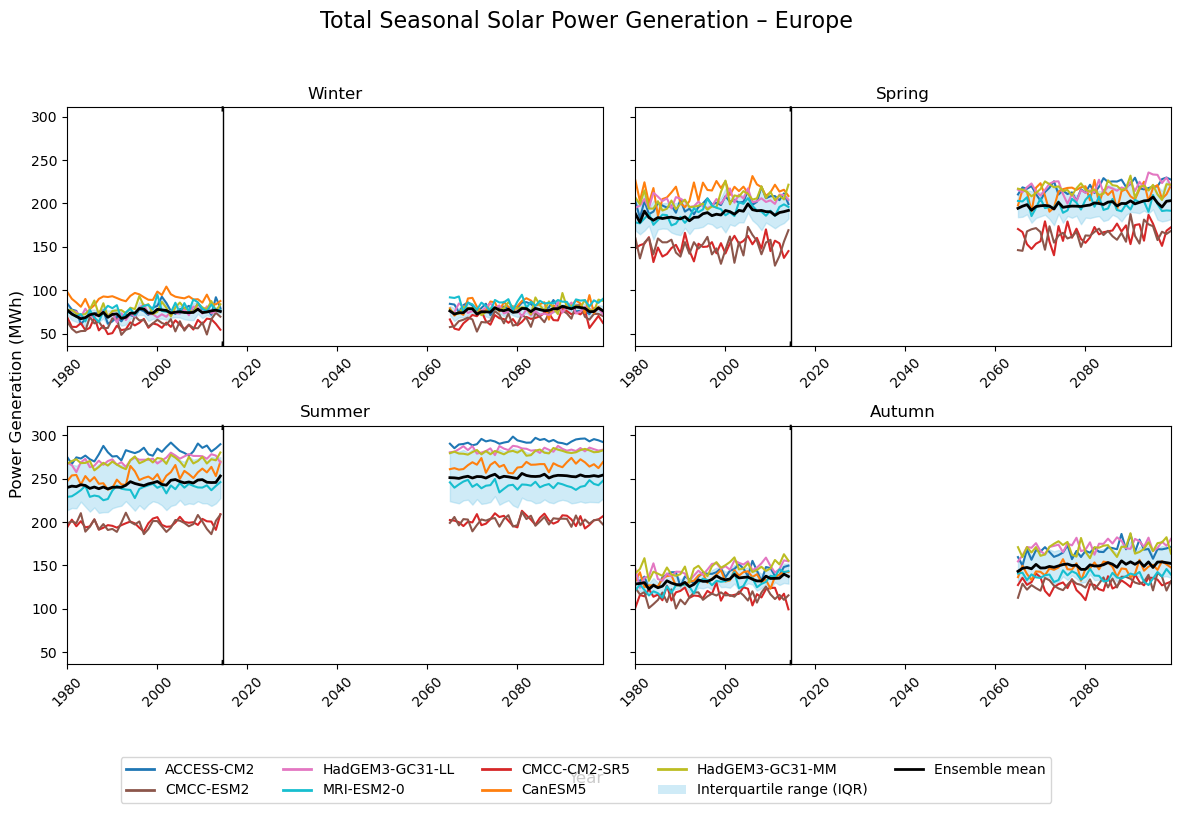

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

EU27 = ['AT','BE','BG','HR','CZ','DK','EE','FR','DE','GR','HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO','SK','SI','ES','SE','CY']
extras = ['GB', 'NO', 'BA', 'ME', 'RS', 'AL', 'MK', 'CH', 'IS', 'TR', 'UA', 'BY', 'MD', 'XK']
countries_of_interest = EU27 + extras

# Load and filter
df = pd.read_csv(csv_path)
df['power_MWh'] = df['power'] / 1e3

# Filter for seasonal entries and selected countries
df_seasonal = df[
    df['ISO_A2'].isin(countries_of_interest) &
    df['season'].isin(['Winter', 'Spring', 'Summer', 'Autumn']) &
    ((df['year'].between(1980, 2014)) | (df['year'].between(2065, 2099)))
]

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_to_ax = dict(zip(season_order, axes.flatten()))

# First pass: get global y-axis limits across all seasons
global_min, global_max = float('inf'), float('-inf')

season_pivots = {}  # cache pivot tables per season

for season in season_order:
    sub = df_seasonal[df_seasonal['season'] == season].copy()

    grouped = (
        sub.groupby(['year', 'model', 'period'])['power_MWh']
        .sum()
        .reset_index()
    )
    pivot = grouped.pivot(index='year', columns='model', values='power_MWh')

    if pivot.dropna(how='all').empty:
        print(f"Skipping {season} – no data available.")
        continue

    season_pivots[season] = pivot
    global_min = min(global_min, pivot.min().min())
    global_max = max(global_max, pivot.max().max())

# Add padding
yrange = global_max - global_min
global_min -= 0.05 * yrange
global_max += 0.05 * yrange

# Second pass: plot
for season in season_order:
    ax = season_to_ax[season]

    if season not in season_pivots:
        ax.set_visible(False)
        continue

    pivot = season_pivots[season]
    mean_series = pivot.mean(axis=1)
    q1_series = pivot.quantile(0.25, axis=1)
    q3_series = pivot.quantile(0.75, axis=1)

    for (start, end) in [(1980, 2014), (2065, 2099)]:
        ix = pivot.loc[start:end].index

        # IQR shading
        ax.fill_between(ix, q1_series.loc[ix], q3_series.loc[ix], color='skyblue', alpha=0.4,
                        label='Interquartile range (IQR)' if (start == 1980 and season == 'Winter') else None)

        # Plot each model
        for model in pivot.columns:
            y = pivot[model].loc[start:end]
            ax.plot(y.index, y, color=model_colors.get(model, 'gray'), lw=1.5,
                    label=model if (start == 1980 and season == 'Winter') else None)

        # Ensemble mean
        y = mean_series.loc[start:end]
        ax.plot(y.index, y, color='black', lw=2,
                label='Ensemble mean' if (start == 1980 and season == 'Winter') else None)

    # Axis break (visual only)
    d = .015
    ax.axvline(x=2014.5, color='k', lw=1)
    ax.plot((2014.5 - d, 2014.5 + d), (global_min, global_min + d * yrange), color='k', clip_on=False)
    ax.plot((2014.5 - d, 2014.5 + d), (global_max - d * yrange, global_max), color='k', clip_on=False)

    ax.set_xlim(1980, 2099)
    ax.set_ylim(global_min, global_max)
    ax.set_title(season)
    ax.tick_params(axis='x', rotation=45)

# Super labels and legend
fig.supxlabel("Year")
fig.supylabel("Power Generation (MWh)")
fig.suptitle("Total Seasonal Solar Power Generation – Europe", fontsize=16)

# Legend (only once)
handles = [plt.Line2D([], [], color=model_colors[m], lw=2) for m in model_colors]
handles += [
    plt.Rectangle((0, 0), 1, 1, facecolor="skyblue", edgecolor="none", alpha=0.4),
    plt.Line2D([], [], color='black', lw=2)
]
labels = list(model_colors.keys()) + ['Interquartile range (IQR)', 'Ensemble mean']
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.02))

# Layout
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


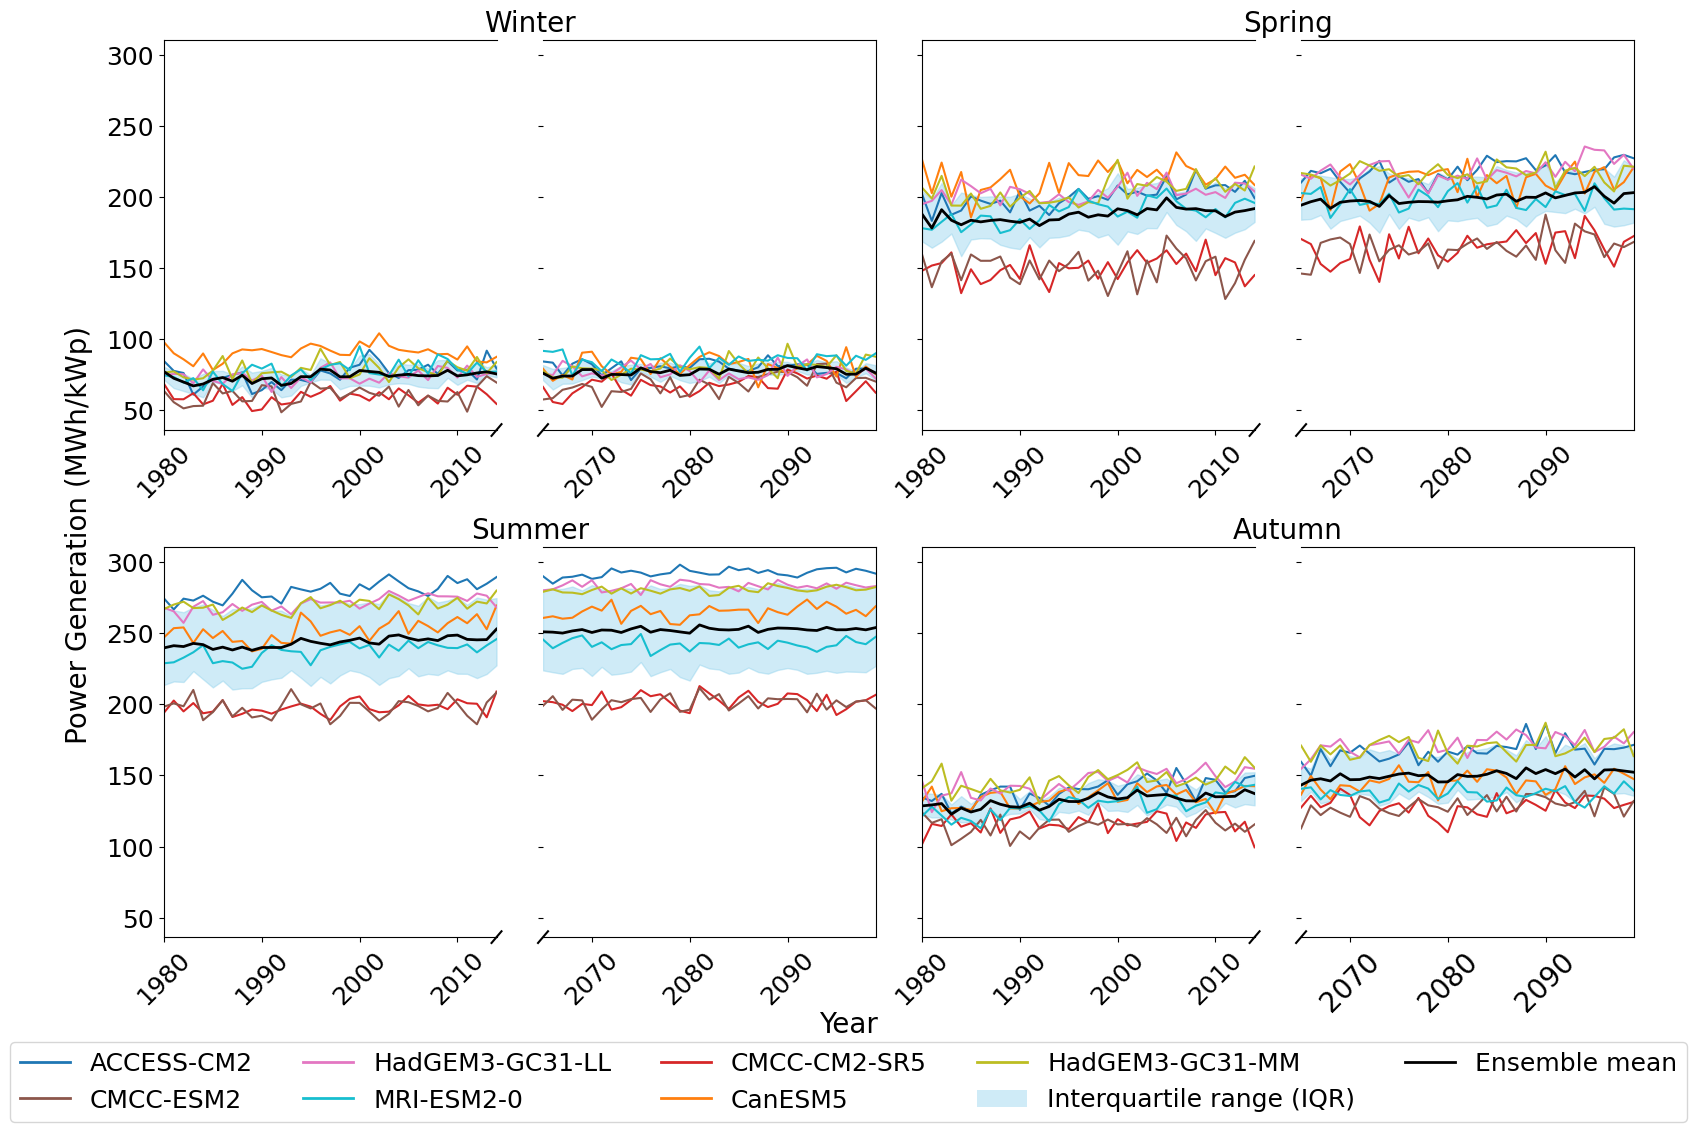

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

EU27 = ['AT','BE','BG','HR','CZ','DK','EE','FR','DE','GR','HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO','SK','SI','ES','SE','CY']
extras = ['GB', 'NO', 'BA', 'ME', 'RS', 'AL', 'MK', 'CH', 'IS', 'TR', 'UA', 'BY', 'MD', 'XK']
countries_of_interest = EU27 + extras

# Load and filter
df = pd.read_csv(csv_path)
df['power_MWh'] = df['power'] / 1e3

# Filter for seasonal entries and selected countries and years
df_seasonal = df[
    df['ISO_A2'].isin(countries_of_interest) &
    df['season'].isin(['Winter', 'Spring', 'Summer', 'Autumn']) &
    ((df['year'].between(1980, 2014)) | (df['year'].between(2065, 2099)))
]

# Create figure with 2x2 subplots, each having two x-panels
fig, axes = plt.subplots(2, 4, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 1, 1, 1]})
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_to_axes = dict(zip(season_order, [(axes[0][i*2], axes[0][i*2+1]) for i in range(2)] +
                                         [(axes[1][i*2], axes[1][i*2+1]) for i in range(2)]))

# First pass: get global y-axis limits
global_min, global_max = float('inf'), float('-inf')
season_pivots = {}

for season in season_order:
    sub = df_seasonal[df_seasonal['season'] == season].copy()
    grouped = sub.groupby(['year', 'model', 'period'])['power_MWh'].sum().reset_index()
    pivot = grouped.pivot(index='year', columns='model', values='power_MWh')
    if pivot.dropna(how='all').empty:
        continue
    season_pivots[season] = pivot
    global_min = min(global_min, pivot.min().min())
    global_max = max(global_max, pivot.max().max())

# Add 5% padding
yrange = global_max - global_min
global_min -= 0.05 * yrange
global_max += 0.05 * yrange

# Second pass: plot each season on its two axes
for season in season_order:
    ax1, ax2 = season_to_axes[season]
    if season not in season_pivots:
        ax1.set_visible(False)
        ax2.set_visible(False)
        continue

    pivot = season_pivots[season]
    mean_series = pivot.mean(axis=1)
    q1_series = pivot.quantile(0.25, axis=1)
    q3_series = pivot.quantile(0.75, axis=1)

    for ax, (start, end) in zip([ax1, ax2], [(1980, 2014), (2065, 2099)]):
        ax.set_xlim(start, end)
        ax.set_ylim(global_min, global_max)
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='x', labelsize=18)  # X-axis tick numbers
        ax.tick_params(axis='y', labelsize=18) 

        ix = pivot.loc[start:end].index

        # IQR
        ax.fill_between(ix, q1_series.loc[ix], q3_series.loc[ix], color='skyblue', alpha=0.4,
                        label='Interquartile range (IQR)' if (start==1980 and season=='Winter') else None)

        # Models
        for model in pivot.columns:
            ax.plot(ix, pivot.loc[ix, model], color=model_colors.get(model, 'gray'), lw=1.5,
                    label=model if (start==1980 and season=='Winter') else None)

        # Mean
        ax.plot(ix, mean_series.loc[ix], color='black', lw=2,
                label='Ensemble mean' if (start==1980 and season=='Winter') else None)

    # X-axis break styling
    d = 0.015
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.plot((1-d, 1+d), (-d, +d), transform=ax1.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), transform=ax2.transAxes, color='k', clip_on=False)

    # Title centered across both
    ax1.set_title(season, fontsize=20, x=1.1)

# Global labels and legend
fig.supxlabel("Year", y=0.08, fontsize=20)
fig.supylabel("Power Generation (MWh/kWp)", fontsize=20, x=0.01)

handles = [plt.Line2D([], [], color=model_colors[m], lw=2) for m in model_colors]
handles += [
    plt.Rectangle((0, 0), 1, 1, facecolor="skyblue", edgecolor="none", alpha=0.4),
    plt.Line2D([], [], color='black', lw=2)
]
labels = list(model_colors.keys()) + ['Interquartile range (IQR)', 'Ensemble mean']
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0), fontsize=18)
ax.tick_params(axis='x', labelsize=20)  # X-axis tick numbers
ax.tick_params(axis='y', labelsize=20) 

fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/seasonal_time_series_europe_power.pdf", bbox_inches='tight', dpi=300)
plt.show()


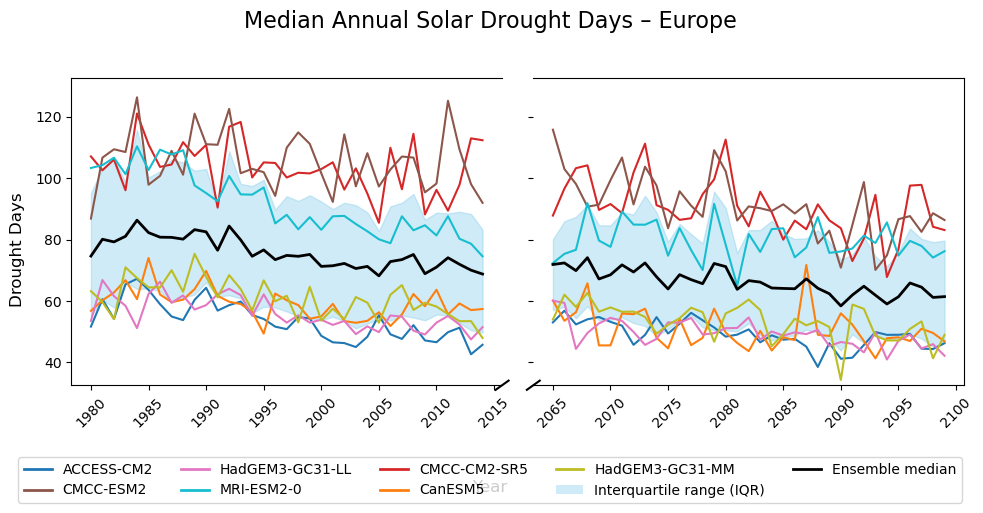

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
drought_path="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/power/country_drought_days_by_year.csv"
# Load your drought data
df = pd.read_csv(drought_path)

# Filter to countries of interest and sort years if needed
df = df[df['ISO_A2'].isin(countries_of_interest)].copy()

# Group by year and model → median across countries
grouped = (
    df.groupby(['year', 'model'])['avg_drought_days']
    .mean()
    .reset_index()
)

# Pivot to have models as columns
pivot = grouped.pivot(index='year', columns='model', values='avg_drought_days')

# Ensemble stats
median_series = pivot.mean(axis=1)
q1_series = pivot.quantile(0.25, axis=1)
q3_series = pivot.quantile(0.75, axis=1)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5),
                               gridspec_kw={'width_ratios': [1, 1]})

# Set consistent y-limits
ymin = pivot.min().min() * 0.95
ymax = pivot.max().max() * 1.05
for ax in (ax1, ax2):
    ax.set_ylim(ymin, ymax)
    ax.tick_params(axis='x', rotation=45)

# Axis break
d = 0.015
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.plot((1-d, 1+d), (-d, +d), transform=ax1.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), transform=ax2.transAxes, color='k', clip_on=False)

# Define periods
boc_years = pivot.index[pivot.index <= 2014]
eoc_years = pivot.index[pivot.index >= 2065]

# Plot each model line
for model in pivot.columns:
    ax1.plot(boc_years, pivot.loc[boc_years, model],
             color=model_colors.get(model, 'gray'), lw=1.5,
             label=model)
    ax2.plot(eoc_years, pivot.loc[eoc_years, model],
             color=model_colors.get(model, 'gray'), lw=1.5)

# Plot ensemble median
ax1.plot(boc_years, median_series.loc[boc_years], color='black', lw=2, label='Ensemble median')
ax2.plot(eoc_years, median_series.loc[eoc_years], color='black', lw=2)

# Plot IQR shading
ax1.fill_between(boc_years, q1_series.loc[boc_years], q3_series.loc[boc_years],
                 color='skyblue', alpha=0.4, label='Interquartile range (IQR)')
ax2.fill_between(eoc_years, q1_series.loc[eoc_years], q3_series.loc[eoc_years],
                 color='skyblue', alpha=0.4)

# Labels and title
fig.suptitle("Median Annual Solar Drought Days – Europe", fontsize=16)
fig.supxlabel("Year")
fig.supylabel("Drought Days")

# Legend
handles = [plt.Line2D([], [], color=model_colors[m], lw=2) for m in model_colors]
handles += [
    plt.Rectangle((0, 0), 1, 1, facecolor="skyblue", edgecolor="none", alpha=0.4),
    plt.Line2D([], [], color='black', lw=2)
]
labels = list(model_colors.keys()) + ['Interquartile range (IQR)', 'Ensemble median']
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.02))

# Adjust layout
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


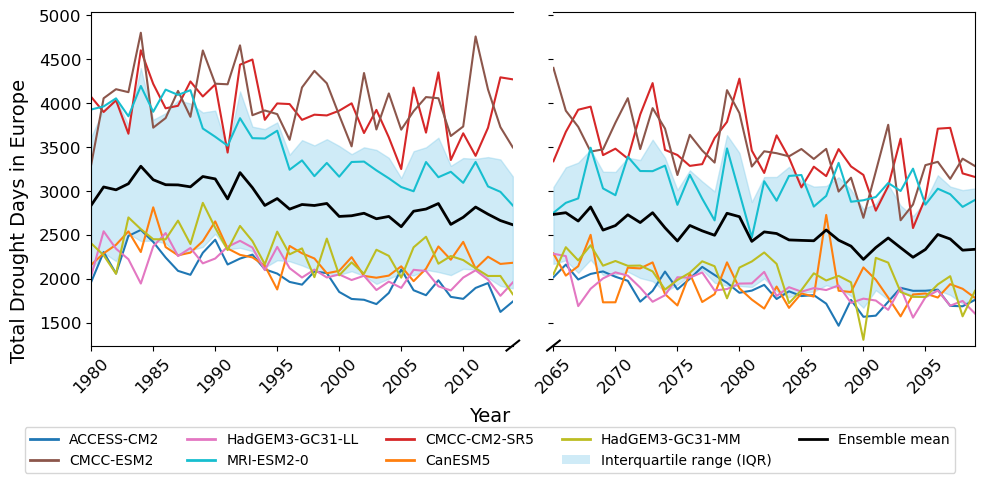

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(drought_path)

# Filter to countries of interest
df = df[df['ISO_A2'].isin(countries_of_interest)].copy()

# Group by year and model: sum across Europe
grouped = (
    df.groupby(['year', 'model'])['avg_drought_days']
    .sum()
    .reset_index()
)

# Pivot: rows = years, columns = models
pivot = grouped.pivot(index='year', columns='model', values='avg_drought_days')

# Ensemble statistics
median_series = pivot.mean(axis=1)
q1_series = pivot.quantile(0.25, axis=1)
q3_series = pivot.quantile(0.75, axis=1)

# Create plot
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5),
                               gridspec_kw={'width_ratios': [1, 1]})

# Set y-axis limits
ymin = pivot.min().min() * 0.95
ymax = pivot.max().max() * 1.05
xmin=1980
xmax=2099
for ax in (ax1, ax2):
    ax.set_ylim(ymin, ymax)
    ax1.set_xlim(xmin, 2014)
    ax2.set_xlim(2065, xmax)
    ax.tick_params(axis='x', labelsize=12, rotation=45)
    ax.tick_params(axis='y', labelsize=12)

# Axis break
d = 0.015
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.plot((1-d, 1+d), (-d, +d), transform=ax1.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), transform=ax2.transAxes, color='k', clip_on=False)

# Define periods
boc_years = pivot.index[pivot.index <= 2014]
eoc_years = pivot.index[pivot.index >= 2065]

# Plot model lines
for model in pivot.columns:
    ax1.plot(boc_years, pivot.loc[boc_years, model],
             color=model_colors.get(model, 'gray'), lw=1.5, label=model)
    ax2.plot(eoc_years, pivot.loc[eoc_years, model],
             color=model_colors.get(model, 'gray'), lw=1.5)

# Plot ensemble median
ax1.plot(boc_years, median_series.loc[boc_years], color='black', lw=2, label='Ensemble mean')
ax2.plot(eoc_years, median_series.loc[eoc_years], color='black', lw=2)

# Plot IQR
ax1.fill_between(boc_years, q1_series.loc[boc_years], q3_series.loc[boc_years],
                 color='skyblue', alpha=0.4, label='Interquartile range (IQR)')
ax2.fill_between(eoc_years, q1_series.loc[eoc_years], q3_series.loc[eoc_years],
                 color='skyblue', alpha=0.4)

# Labels and layout
fig.supxlabel("Year", fontsize=14, y=0.09)
fig.supylabel("Total Drought Days in Europe", fontsize=14)

# Legend
handles = [plt.Line2D([], [], color=model_colors[m], lw=2) for m in model_colors]
handles += [
    plt.Rectangle((0, 0), 1, 1, facecolor="skyblue", edgecolor="none", alpha=0.4),
    plt.Line2D([], [], color='black', lw=2)
]
labels = list(model_colors.keys()) + ['Interquartile range (IQR)', 'Ensemble mean']
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.02))

fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/figures/time_series_drought_days_europe.pdf", bbox_inches='tight', dpi=300)
plt.show()
